In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import image
from scipy.spatial.transform import Rotation

In [244]:
def R_x(angl):
    """Определение матриц поворота вокруг оси х"""
    Rx = np.array([[1,            0,             0],
                   [0, np.cos(angl), -np.sin(angl)],
                   [0, np.sin(angl),  np.cos(angl)]])
    return Rx

def R_y(angl):
    """Определение матриц поворота вокруг оси х"""
    Ry = np.array([[ np.cos(angl), 0, np.sin(angl)],
                   [ 0,            1,            0],
                   [-np.sin(angl), 0, np.cos(angl)]])
    return Ry

def R_z(angl):
    """Определение матриц поворота вокруг оси х"""
    Rz = np.array([[np.cos(angl), -np.sin(angl), 0],
                   [np.sin(angl),  np.cos(angl), 0],
                   [           0,             0, 1]])
    return Rz

def quaternion_product(q, p):
    """Определение произведения кватернионов"""
    q_rez = np.array([q[0]*p[0]-q[1]*p[1]-q[2]*p[2]-q[3]*p[3],
                      q[0]*p[1]+q[1]*p[0]+q[2]*p[3]-q[3]*p[2],
                      q[0]*p[2]-q[1]*p[3]+q[2]*p[0]+q[3]*p[1],
                      q[0]*p[3]+q[1]*p[2]-q[2]*p[1]+q[3]*p[0]])
    return q_rez

"""Словарь функций поворота"""
marix = {"x": R_x,
         "y": R_y,
         "z": R_z}

In [245]:
"""Еденичный вектор x"""
x = np.array([[1],
              [0],
              [0]])
"""Еденичный вектор z""" 
z = np.array([[0],
              [0],
              [1]])

In [246]:
def Rotations(marix, initial_vector, angles, type_of_rotation ="default", 
              conversion_type ="default", sequence_of_rotation ="default"):
    
    """Функция расчета поворотов через матрицы поворотов и углы Эйлера, Тейта - Брайана
    запись поворота прямая алгебраическая означает что такая запись xyz комбинирует операторы поворота в той же 
    последовательности, тоесть R_x(alpha)*R_y(beta)*R_z(gamma)*v, где v вектор. 
    Углы задаются последовательностью которой комбинируется поворот alpha, beta, gamma задается массивом с таким порядком.
    type_of_rotation - внешний или внутренний поворот (extrinsic/intrinsic)
    conversion_type - прямое или обратное преобразование (direct/inverse)
    sequence_of_rotation - последовательность операторов поворота "xyz"
    """
    
    """Простая проверка"""
    if (sequence_of_rotation =="default"):
        raise ValueError("error - последовательность поворотов не задана")
    elif (conversion_type == "default"):
        raise ValueError("error - прямое/обратное перобразование на задано")
    elif (type_of_rotation == "default"):
        raise ValueError("error - тип поворота не задан")

    
    """приведение строк к нужному типу"""
    sequence_of_rotation = sequence_of_rotation.casefold()
    type_of_rotation = type_of_rotation.lower()
    conversion_type = conversion_type.lower()

    """Вычисление преобразований"""
    rez_vector = initial_vector
    
    if (type_of_rotation == "extrinsic"):
        
        if (conversion_type == "direct"):
        
            angle_order = 0
            
            for order in sequence_of_rotation[::-1]:
                rez_vector = (marix[order](angles[int(len(angles)-1)-angle_order])).dot(rez_vector)  
                angle_order += 1
            return rez_vector
        
        elif(conversion_type == "inverse"):
            
            angle_order = 0       
            for order in sequence_of_rotation:
                rez_vector = ((marix[order](angles[angle_order])).T).dot(rez_vector)  
                angle_order += 1
            return rez_vector
                 
    elif (type_of_rotation == "intrinsic"):
        
        if (conversion_type == "direct"):
            
            angle_order = 0       
            for order in sequence_of_rotation:
                rez_vector = (marix[order](angles[angle_order])).dot(rez_vector)  
                angle_order += 1
            return rez_vector
        
        elif(conversion_type == "inverse"):
            
            angle_order = 0       
            for order in sequence_of_rotation[::-1]:
                rez_vector = ((marix[order](angles[int(len(angles)-1)-angle_order])).T).dot(rez_vector)  
                angle_order += 1
            return rez_vector

проверка над сторонним решением 

In [247]:
chek_v = Rotation.from_euler('zyx', [3, 2, 1]).apply(np.array([1, 0, 0]))
chek_v

array([ 0.41198225, -0.68124272,  0.60512725])

In [248]:
chek_v_my = Rotations(marix, x, np.array([1, 2, 3]),
                    type_of_rotation="extrinsic", conversion_type="direct",
                    sequence_of_rotation="xyz")
chek_v_my

array([[ 0.41198225],
       [-0.68124272],
       [ 0.60512725]])

In [249]:
(Rotation.from_euler('zyx', [3, 2, 1]).inv()).apply(chek_v)

array([ 1.00000000e+00, -1.11022302e-16,  1.11022302e-16])

In [250]:
Rotations(marix, chek_v_my, np.array([1, 2, 3]),
                    type_of_rotation="extrinsic", conversion_type="inverse",
                    sequence_of_rotation="xyz")

array([[1.00000000e+00],
       [6.30526105e-17],
       [8.69606659e-19]])

In [255]:
def q_1(angl):
    return np.array([np.cos(angl/2), np.sin(angl/2), 0, 0])

def q_2(angl):
    return np.array([np.cos(angl/2), 0, np.sin(angl/2), 0])

def q_3(angl):
    return np.array([np.cos(angl/2), 0, 0, np.sin(angl/2)])

quat = {"x": q_1,
        "y": q_2,
        "z": q_3}

In [276]:
def rotation_quat(quat, initial_vector, angles,
                  conversion_type ="default", sequence_of_rotation ="default"):

    """Простая проверка"""
    if (sequence_of_rotation =="default"):
        raise ValueError("error - последовательность поворотов не задана")
    elif (conversion_type == "default"):
        raise ValueError("error - прямое/обратное перобразование на задано")

    """приведение строк к нужному типу"""
    sequence_of_rotation = sequence_of_rotation.casefold()
    conversion_type = conversion_type.lower()

    """Вычисление преобразований"""
    rez_vector = initial_vector

    angle_order = 0 
    quat_array = np.zeros((len(sequence_of_rotation), 4))

    for order in sequence_of_rotation:
        quat_array[angle_order, :] = quat[order](angles[angle_order])       
        angle_order += 1
    
    """Произведение кватернионов как результирующий поворот"""
    q = quaternion_product(quat_array[0, :], quat_array[1, :])
    for i in range(1, len(sequence_of_rotation)-1):    
        q = quaternion_product(q, quat_array[i+1, :])
        
    """ матрица направляющих косинусов через коэфициенты кватерниона"""
    QR =  np.array([[q[0]**2 + q[1]**2 - q[2]**2 - q[3]**2, 2*(q[1]*q[2] - q[0]*q[3]), 2*(q[0]*q[2] + q[1]*q[3])],
                    [2*(q[0]*q[3] + q[1]*q[2]), q[0]**2 - q[1]**2 + q[2]**2 - q[3]**2, 2*(q[2]*q[3] - q[0]*q[1])],
                    [2*(q[1]*q[3] - q[0]*q[2]), 2*(q[0]*q[1] + q[2]*q[3]), q[0]**2 - q[1]**2 - q[2]**2 + q[3]**2]])
    
    if (conversion_type == "direct"):
        rez_vector = QR.dot(initial_vector)
    elif (conversion_type == "inverse"):
        rez_vector = (QR.T).dot(initial_vector)
    
    
    
    return rez_vector


проверка

In [273]:
chek_v = Rotation.from_euler('zyx', [1, 2, 3]).apply(np.array([1, 0, 0]))
chek_v

array([-0.2248451 , -0.76371834,  0.60512725])

In [275]:
rotation_quat(quat, x, np.array([3, 2, 1]),"inverse","xyz")

array([ 1.00000000e+00,  1.86076095e-17, -5.20589081e-17])

In [257]:
#колличество итераций
N = 1000 
#время
t = np.linspace(0, 30, N)
#частота
w = 0.25
#амплитуда
A = 1/4
#углы параметризированные временем (качка)
phi_arr = A/2*np.sin(2*np.pi*w/5*t)
tet_arr = A*np.cos(2*np.pi*w/2.5*t)
psi_arr = A*np.sin(2*np.pi*w*t)

<IPython.core.display.Javascript object>


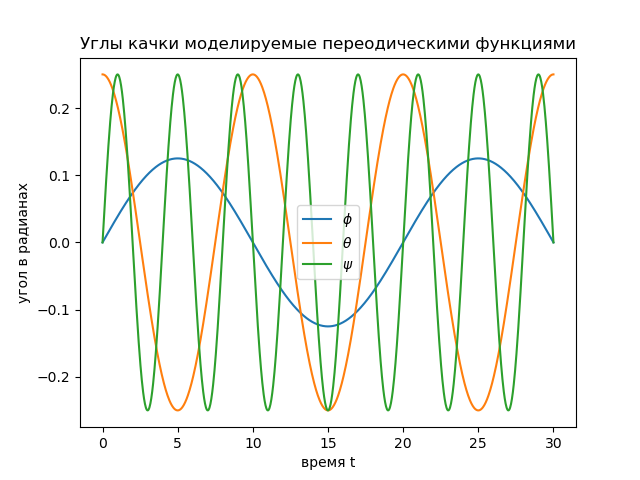

In [259]:
plt.plot(t, phi_arr, label=r'$\phi$')
plt.plot(t, tet_arr, label=r'$\theta$')
plt.plot(t, psi_arr, label=r'$\psi$')
plt.legend()
plt.xlabel('время t')
plt.ylabel('угол в радианах')
plt.title('Углы качки моделируемые переодическими функциями')
plt.show()

In [270]:
#моделирование через углы Тейта - Брайана и extrinsic rotation, 
# в виду интуитивно понятного вращения вокруг неподвижных осей
# входной вектор
r = np.array([[0],
              [0],
              [1]])
# определение результирующего вектора и углов
rez_vect = np.zeros((3, N))
phi_zx = np.zeros((N))
phi_zy = np.zeros((N))
rez_vect[:, 0] = r[:, 0]
# расчет всех поворотов как действия оператора во времени
for i in range(1, N):
    rez_vect[:, i] = rotation_quat(quat, r, np.array([phi_arr[i], tet_arr[i], psi_arr[i]]),"direct","zyx")[:,0]
#         r, phi_arr[i], tet_arr[i], psi_arr[i], "extrinsic", "XYZ")[:,0]

<IPython.core.display.Javascript object>


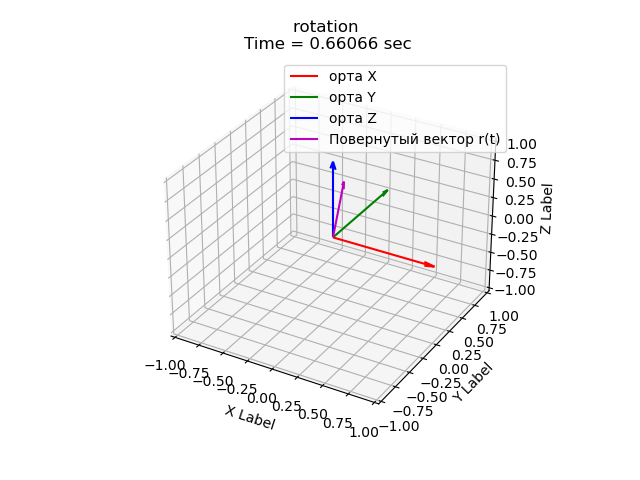

In [271]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    ax.quiver(0, 0, 0, 1, 0, 0, color='r', arrow_length_ratio=0.1, label=r'орта X')
    ax.quiver(0, 0, 0, 0, 1, 0, color='g', arrow_length_ratio=0.1, label=r'орта Y')
    ax.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1, label=r'орта Z')
    ax.quiver(0, 0, 0, rez_vect[0, frame], rez_vect[1, frame], rez_vect[2, frame], color='m', arrow_length_ratio=0.1, label=r'Повернутый вектор r(t)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    
    ax.set_title('rotation \nTime = ' + str((float('{:.5f}'.format(frame*(t[1]-t[0]))))) + ' sec')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()
ani = FuncAnimation(fig, update, frames=N, interval=5)
plt.show()